<a href="https://colab.research.google.com/github/siva41/107-2-Multimedia/blob/master/keras_MLP_h1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [0]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [32]:
train_history =model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.2945 - acc: 0.9151 - val_loss: 0.1526 - val_acc: 0.9568
Epoch 2/10
 - 1s - loss: 0.1181 - acc: 0.9663 - val_loss: 0.1074 - val_acc: 0.9680
Epoch 3/10
 - 1s - loss: 0.0760 - acc: 0.9783 - val_loss: 0.0926 - val_acc: 0.9734
Epoch 4/10
 - 1s - loss: 0.0516 - acc: 0.9849 - val_loss: 0.0868 - val_acc: 0.9743
Epoch 5/10
 - 1s - loss: 0.0358 - acc: 0.9905 - val_loss: 0.0750 - val_acc: 0.9752
Epoch 6/10
 - 1s - loss: 0.0254 - acc: 0.9935 - val_loss: 0.0734 - val_acc: 0.9778
Epoch 7/10
 - 1s - loss: 0.0184 - acc: 0.9960 - val_loss: 0.0726 - val_acc: 0.9789
Epoch 8/10
 - 1s - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0716 - val_acc: 0.9783
Epoch 9/10
 - 1s - loss: 0.0088 - acc: 0.9988 - val_loss: 0.0721 - val_acc: 0.9801
Epoch 10/10
 - 1s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0715 - val_acc: 0.9796


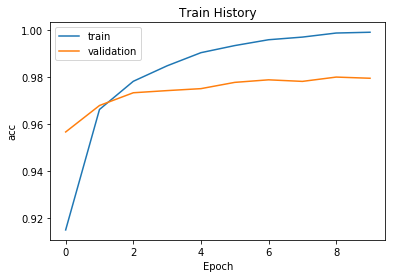

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

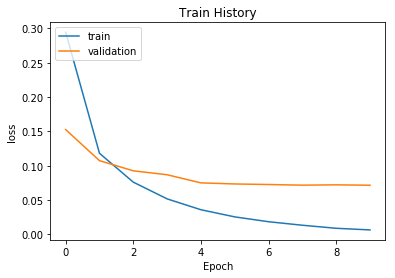

In [34]:
show_train_history(train_history,'loss','val_loss')

In [35]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 38us/step

accuracy= 0.9802


In [36]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

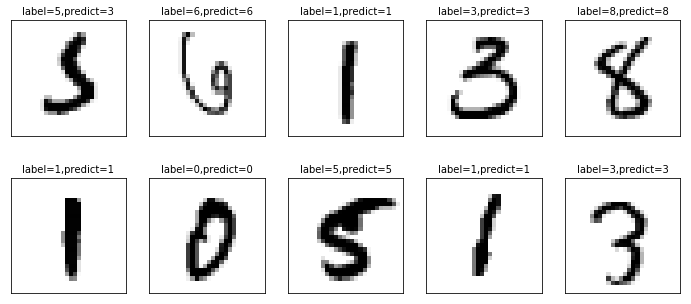

In [37]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
           title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [38]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,2,1,1,0,1,1,2,0
1,0,1129,3,0,0,1,0,1,1,0
2,2,1,1008,7,2,0,2,7,3,0
3,2,0,1,998,0,2,0,3,3,1
4,1,2,5,1,964,0,1,1,1,6
5,3,0,0,20,1,853,6,2,3,4
6,4,3,0,1,5,5,940,0,0,0
7,1,5,9,4,1,0,0,1004,2,2
8,3,0,4,13,3,0,1,3,945,2


In [39]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [40]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
1670,5,3
2035,5,3
2162,5,3
2291,5,3
2526,5,3
2597,5,3


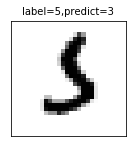

In [41]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

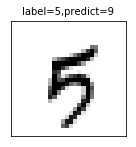

In [42]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)